# Estadística básica
En este módulo vamos a probar cómo podemos utilizar python para realizar algunos análisis estadísticos habituales y algunas pruebas.

In [2]:
import pandas as pd # datos tabulados
import scipy.stats as stats # librería de estadística general
import numpy as np # funciones matemáticas y aleatorias
import matplotlib.pyplot as plt # gráficos básicos y personalización
import seaborn as sns # gráficos avanzados

## Teorema del límite central
> El Teorema del límite central (TLC) nos dice que la media de medias muestrales tiende a aproximarse más a la media poblacional que la media de cada muestra.

Trabajaremos bajo una distribución normal estándar $X \sim N(\mu=0, \sigma=1)$.


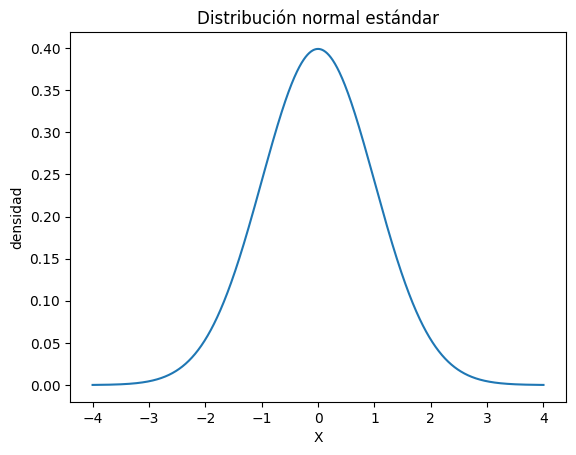

In [3]:
mu = 0 # media
sigma = 1 # desviación estándar
pob = stats.norm(mu, sigma) # definimos la distribución poblacional
# veamos cómo se distribuye en el intervalo [-4, 4]
x = np.linspace(-4, 4, 1000) # 1000 datos distribuidos uniformemente en el intervalo
y = pob.pdf(x) # función de densidad de probabilidad
plt.plot(x, y)
plt.title('Distribución normal estándar')
plt.ylabel('densidad')
plt.xlabel('X')
plt.show()

Para comenzar, tomemos una muestra aleatoria de 20 datos y obtendremos su media.

In [4]:
samp = pob.rvs(size=20) # R. V. S. es Random Variable Sample
samp_mean = samp.mean()
print('La media de a muestra es:', samp_mean)


La media de a muestra es: -0.017762700405361966


Como vemos, $media_{muestral} \neq media_{poblacional}$.

Repetiremos el experimento pero esta vez tomaremos 100 muestras independientes.
guardaremos de cada una su media en una lista y posteriormente
calcularemos la media de medias muestrales.


In [5]:
medias = []
for _ in range(100): # repetir 100 veces
  samp = pob.rvs(size=20)
  mean = samp.mean()
  medias.append(mean)

media_de_medias = np.mean(medias)
print('La media de medias muestrales es:', media_de_medias)

La media de medias muestrales es: 0.01141269675992782


Ahora visualicemos las medias muestrales con "rugplot".

(-0.75, 0.75)

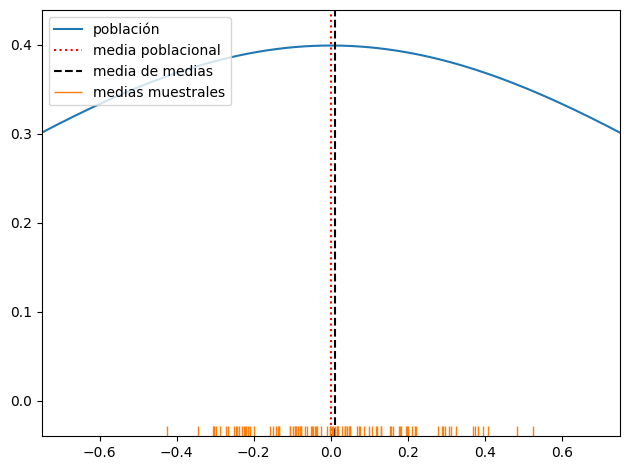

In [6]:
plt.plot(x, y, label='población')
plt.axvline(0, ls=':', color='red', label='media poblacional')
plt.axvline(media_de_medias, ls='--', color='black', label='media de medias')
sns.rugplot(medias, label='medias muestrales')
plt.legend(loc='upper left')
plt.tight_layout()
plt.xlim(-0.75, 0.75)

Como se puede observar las medias de las muestras se dispersan generalmente entre -0.75 y 0.75, sin embargo, la media de medias de forma consistente
aparece muy cercana a 0 (la media poblacional).



## Ley de los grandes números
> A medida que el tamaño de la muestra aumenta, la media muestral converge (en probabilidad o casi seguramente) hacia la media verdadera de la población.

Tomaremos muestras de tamaño creciente.


,n=5,n=10,n=30,n=1000,n=10000
media,-0.069119,-0.432459,-0.321682,-0.020442,-0.011567
desv. est.,1.908466,1.198717,1.181123,1.040151,0.995438
asimetría,-0.100921,0.013600,-0.391623,-0.091678,-0.007744
ex. kurtosis,-1.324952,-0.706845,-0.268218,0.341274,-0.015137


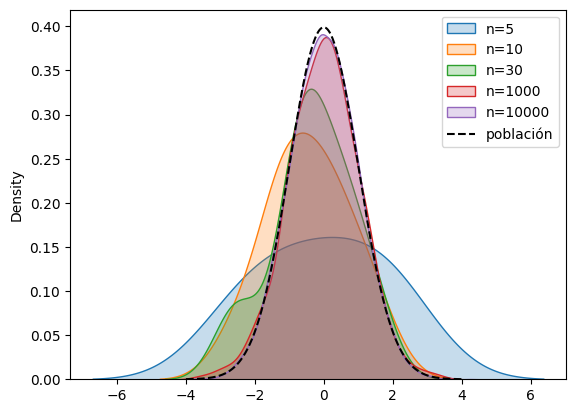

In [7]:
tamaños = [5, 10, 30, 1000, 10000]
df = pd.DataFrame(index=['media', 'desv. est.', 'asimetría', 'ex. kurtosis'],)
for n in tamaños:
  samp = pob.rvs(size=n)
  # graficar la distribución estimada (kde)
  sns.kdeplot(samp, label=f'n={n}', fill=True)
  res = stats.describe(samp)
  df[f'{n=}'] = [
    res.mean,
    res.variance**0.5,
    res.skewness,
    res.kurtosis
]

# graficar la distribución poblacional
plt.plot(x, y, label='población', color='black', ls='--')
plt.legend()
df

En la tabla podemos observar los 4 momentos de la distribución, Media, $\sqrt{Varianza}$, asimetría y exceso de kurtosis.

Se observa claramente que conforme el tamaño muestral aumenta, la desviación de la distribución poblacional disminuye.


In [8]:
pob.stats(moments='mvsk')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0))

Como se observa, la distribución con mayor tamaño muestral es la que menos se desvía de la población y el efecto es dosis dependiente.

## Varianza poblacional vs muestral
Cuando se calcula la varianza de la población la fórmula es:

$\sigma^2 = \frac{\sum{(x_i-\mu)^2}}{n}$

Sin embargo, cuando la calculamos para la muestra, se ajusta el denominador para los grados de libertad

$s^2 = \frac{\sum{(x_i-\bar{X})^2}}{n-1}$

Esto se debe a que el estimador de la varianza es sesgado, tiende a subestimar la varianza muestral.

Al hacer más pequeño el denominador, se logra incrementar (corregir) el estimando.

El siguiente ejemplo muestra el porcentaje de las varianzas muestrales corregidas y no corregidas que son menores a la varianza poblacional.


In [9]:
vars_pob = []
vars_sam = []

for n in range(10000):     # tomemos 10,000 muestras aleatorias.
  samp = pob.rvs(size=100) # de 100 datos
  vars_pob.append(np.var(samp, ddof=0)) # varianza poblacional
  vars_sam.append(np.var(samp, ddof=1)) # varianza muestral

print(f'No corregidas menores a 1: {sum(v<1 for v in vars_pob)/10000:.2%}')
print(f'Corregidas menores a 1: {sum(v<1 for v in vars_sam)/10000:.2%}')

No corregidas menores a 1: 55.40%
Corregidas menores a 1: 52.74%


Se podrá constatar de forma constante que sin corrección, se subestima la varianza poblacional si no se ajustan los grados de libertad.


## Regresión lineal simple

Fórmula

$y \sim \beta_0 + \beta_1X + \epsilon$

$\text{Pendiente} =\beta_1 = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}$

$\text{Intercepto} = \beta_0 = \bar{y} - \beta_1\bar{x}$

$y_{pred} = \beta_0 + \beta_1 x$


In [10]:
def linreg(x, y):
  "x, y: np.array o pd.Series"
  x_media = np.mean(x) # media x
  y_media = np.mean(y) # media y
  numerador = sum(     # numerador de b1
      (x-x_media) * (y-y_media)
  )
  denominador = sum(   # denominador de b1
      (x-x_media)**2
  )
  beta_1 = numerador/denominador # pendiente
  beta_0 = y_media - beta_1 * x_media # intercepto
  return beta_0, beta_1

-0.17093071595204457 -0.6182263608226546


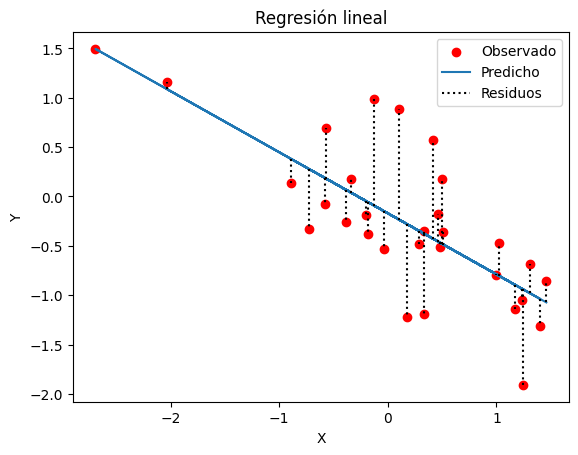

In [11]:
# Simular distribución normal multivariada con X y Y
mu = 0, 0 # media de x y media de y
sigma1, sigma2 = 1,1 # desviación estándar de x y de y
rho = -0.8 # coeficiente de correlación

cov = [ # matriz de covarianza
    [sigma1**2, rho * sigma1 * sigma2], # [var_x, covar(x,y)]
    [rho * sigma1 * sigma2, sigma2**2]  # [covar(x, y), var_y]
]

samp = stats.multivariate_normal(
    mu, # medias
    cov=cov, # matriz de covarianza
    allow_singular=True # permite rho de 1 y 0
).rvs(size=30) # muestra de 30 observaciones

# La primera dimensión son las filas, la segunda son las columnas
x = samp[:, 0] # extraer X
y = samp[:, 1] # extraer Y


b0, b1 = linreg(x, y) # corre función y regresa intercepto y pendiente
y_pred = b0 + b1 * x # calcular valores predichos
print(b0, b1) # imprimir a consola
plt.scatter(x, y, label='Observado', color='r') # dispersión simple
plt.plot(x, y_pred, label='Predicho') # línea de la regresión
plt.vlines(x, y_pred, y, label='Residuos', ls=':', color='k')
plt.xlabel('X') # formato
plt.ylabel('Y') # formato
plt.title('Regresión lineal') # formato
plt.legend() # formato
plt.show()

In [12]:
stats.linregress(x, y)

LinregressResult(slope=np.float64(-0.6182263608226545), intercept=np.float64(-0.17093071595204457), rvalue=np.float64(-0.7487373487154864), pvalue=np.float64(1.9469837520175265e-06), stderr=np.float64(0.1034344639589566), intercept_stderr=np.float64(0.09899179355169027))

# Análisis inferencial
En python es muy sencillo realizar todo tipo de análisis estadísticos desde los más básicos hasta modelos complejos bayesianos y de aprendizaje supervisados y no supervisados.

## Librerías básicas

In [13]:
import scipy.stats as stats # análisis básicos
import statsmodels.api as sm # avanzados



# Análisis AB

Ejecuta la celda siguiente para realizar los análisis.

In [14]:
a = [1,2,3,4]
b = [5,6,7,8]

### t de Student

In [15]:
print('una muestra:', stats.ttest_1samp(a, 3)) # a es la lista [1,2,3,4]
# esta prueba nos dice si la media de una muestra difiere del
# un parámetro poblacional dado, en este caso 3
print('muestras independientes:', stats.ttest_ind(a, b))
# esta prueba nos dice si la media del arreglo a es diferente del b
print('de welch: ', stats.ttest_ind(a, b, equal_var=False))
# versión de welch (sin asumir varianzas iguales)
print('pareadas: ', stats.ttest_rel(a, b)) # el error es esperado, analízalo
# esta prueba nos dice si hay diferencias en muestras pareadas

una muestra: TtestResult(statistic=np.float64(-0.7745966692414834), pvalue=np.float64(0.495025346059711), df=np.int64(3))
muestras independientes: TtestResult(statistic=np.float64(-4.381780460041329), pvalue=np.float64(0.004659214943993936), df=np.float64(6.0))
de welch:  TtestResult(statistic=np.float64(-4.3817804600413295), pvalue=np.float64(0.004659214943993928), df=np.float64(6.0))
pareadas:  TtestResult(statistic=np.float64(-inf), pvalue=np.float64(0.0), df=np.int64(3))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


### U de Mann Whitney

In [16]:
stats.mannwhitneyu(a, b)

MannwhitneyuResult(statistic=np.float64(0.0), pvalue=np.float64(0.02857142857142857))

### wilcoxon


In [17]:
stats.wilcoxon(a, b)

WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(0.125))

## Cómo extraer los valores claves de la prueba:
Los resultados de cada prueba pueden guardarse en una variable, el objeto de tipo resultado puede ser accedido con notación de punto a cada valor, por ejemplo:

In [18]:
resultado = stats.wilcoxon(a, b)
print('El valor p de la prueba de wilcoxon fue:', resultado.pvalue)

El valor p de la prueba de wilcoxon fue: 0.125


## Documentación Scipy

Para ver todas las prueba y análisis posibles, así como conocer qué resultados devuelve, consulta [la documentación](https://docs.scipy.org/doc/scipy/reference/index.html)

El el campo de búsqueda pon lo que quieras hacer y si existe en scipy te mostrará cómo.


## Regresiones con statsmodels.
Statsmodels permite realizar modelajes estadísticos comunes.
Primero carguemos los datos

In [19]:
import pandas as pd

df = pd.read_excel('/content/base_tut_1.xlsx')
df['dm2_bin'] = df['DM2'].eq('SI').astype(int) # convertimos a binario
df['imc'] = df['peso']/df['talla']**2
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/base_tut_1.xlsx'

In [ ]:
# veamos un ejemplo de regresión, para predecir la presencia de DM2.
# Para ello haremos una regresión logística, la variable de resultado es DM2
# El resto de las variables serán predictoras
model = sm.Logit.from_formula(
    'dm2_bin ~ edad + imc + TAS + C(sexo)', #definimos la fórmula de la regresión
    df, # luego pasamos el arreglo de datos
)
result = model.fit()
print(result.summary())

### Exponenciar el coeficiente
Por default la regresión arroja el coeficiente, no exp($\beta$) como normalmente se requiere.

En la siguiente celda haremos una tabla con exp($\beta$) y su intervalo de confianza

In [ ]:
import numpy as np
#comenzamos con el intervalo
ora = result.conf_int()# ora es odds ratio ajustado
ora.insert(0, 'OR', result.params) # agregamos el coeficiente
ora = np.exp(ora) # exponenciamos
ora # ahora podemos ver los Odds ratios y sus intervalos de confianza.